In [11]:
#this project with tie in previous concepts of data management, filtering, visual encoding, color styling, interactivity,
#and dashboarding.

#https://youtu.be/kgdJXN-M3g0 <<<<link to video on this project

#TWEAK the code below to make the following changes:
#1) add a different data source instead of animal and rating, using anything else.  You can either
#     directly type data in or load a dataframe from a csv
#2) add an additional visualisation.  it can be a bar chart, column chart, line chart, anything really.  Do not remove 
#     the existing bar chart.  
#3) conform to a company's marketing / recommended color requirements and share the link to the palette in your code.
#4) submit your homework as a link to your github ipynb page.

In [12]:
import param
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
pn.extension()

# make plots static
%matplotlib inline

In [49]:
df = pd.read_csv('reading_levels.csv')
df.rename(columns = {'reading_grade_level':'reading_level', 'first_choice_college': 'college_choice'}, inplace = True)
new_df = df['college_choice']
new_df = new_df.replace(1, 'yes')
new_df = new_df.replace(0, 'no')
df['college_choice'] = new_df
df

,age_months,reading_level,college_choice
0,201,16.874578,yes
1,41,0.286801,no
2,98,4.625354,no
3,205,13.976119,no
4,117,8.284185,no
...,...,...,...
982,209,17.460660,yes
983,187,18.534054,no
984,98,3.761168,no
985,213,14.015934,no


In [52]:
class ChoiceDashboard(param.Parameterized):
    
    # drop down selector widget containing the list of animals, with the default being 'Goat'
    college_choice = param.ObjectSelector(default='no', objects=list(df.college_choice.unique()))
    
    # create data set containing only the data applicable to the animal in the drop down selector
    def get_data(self):
        class_df = df[(df.college_choice==self.college_choice)].copy()
        return class_df
    
    # seaborn box plot for the chosen animal
    #Add another visualization!
    #change the color! Find a companies branding website and use their approved HEX code, RGB
    #example of color branding here: https://marketing.illinois.edu/visual-identity/color
    
    def box_view(self):
        data = self.get_data() 
        ax = sns.boxplot(data['reading_level'])
        plt.close()
        return ax.figure
    
    def table_view(self):
        data = self.get_data()
        return data

C:\Users\17738\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\17738\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\17738\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



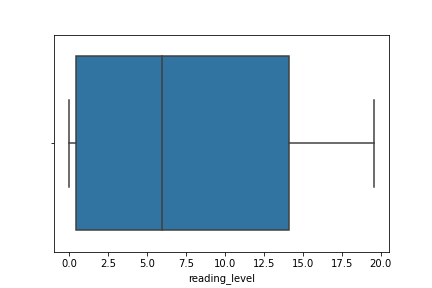
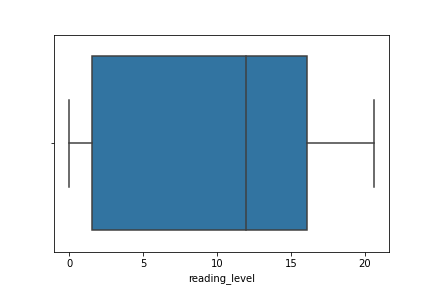

In [53]:
# create an instance of the class
rd = ChoiceDashboard(name='')

# create a title for the dashboard
dashboard_title = '# Reading Level College Choice Dashboard'

# create some text describing the dashboard
dashboard_desc = 'An example of a simple interactive HoloViz Panel dashboard using a dummy data set of reading levels and first choice college acceptances.'

# create a dashboard, defining the layout as one column containing the
# dashboard title, dashboard description, 'Animal' drop down selector,
# box plot, and data table
dashboard = pn.Column(dashboard_title, 
                      dashboard_desc,   
                      rd.param,       # 'Animal' drop down selector
                      rd.box_view,    # box plot
                      rd.table_view   # data table
                     )

dashboard.embed(max_opts = 2)

In [60]:
import matplotlib.pyplot as plt
import numpy as np

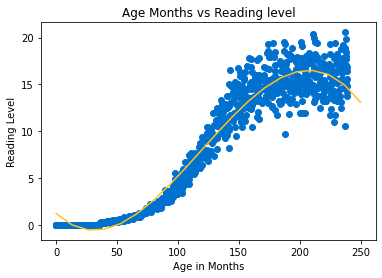

In [110]:
# I used Walmart's color pallete
# https://one.walmart.com/content/dam/px/associate_brand_center/all-company-brand-guidelines/ab_color_palette_191016.pdf
plt.title('Age Months vs Reading level')
plt.xlabel('Age in Months')
plt.ylabel('Reading Level')

mymodel = np.poly1d(np.polyfit(df['age_months'], df['reading_level'], 4))

myline = np.linspace(0, 250, 20)

plt.scatter(df['age_months'], df['reading_level'], color='#0071ce')
plt.plot(myline, mymodel(myline), color = '#ffc220')
plt.show()